In [1]:
%cd ~/github/agn_lf/

/Users/runburg/github/agn_lf


In [2]:
import source.astro_functions as af
import source.table_functions as tf
import source.lf_xi2 as xi2
import source.lf_vmax as vmax
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# use table with agn_flag
from astropy.io import fits
import astropy.table as table
# catalog = fits.open("data/Anna_Nick_Tractor_photometry_samplev9_MASTER.fits", memmap=True)
# ct = table.Table(catalog[1].data)
# flagged_agn = ct[np.where(ct['agn_flag'] == 1)]
# flagged_agn = table.Table(flagged_agn, masked=True, copy=False)
# # for col in flagged_agn.columns.values():
# #     try:
# #         col.mask = np.isnan(col)
# #     except TypeError:
# #         continue
# flagged_agn.write('./data/flagged_agn.fits', format='fits')
flagged_agn = table.Table.read('./data/flagged_agn.fits')

In [4]:
band = 'Mag_U_CFHT'
band_err = 'Mag_err_U_CFHT'
z_cols = ('zSpec', 'z_eazy')
mid = 'Mag_U_CFHT_abs'
band_vmax = 'Mag_U_CFHT_Vmax'
mid, low, high = tf.add_abs_mag_and_err_to_table(flagged_agn, band, band_err, z_cols)
band_vmax = vmax.add_V_max_to_table(flagged_agn, band, band_err, mid, ('zSpec', 'z_eazy'))
flagged_agn.write('./data/flagged_agn_w_mag_and_vmax.fits')
flagged_agn = table.Table.read('./data/flagged_agn_w_mag_and_vmax.fits')

Mag is nan for Object 2502
Mag is nan for Object 15742
Mag is nan for Object 16371
Mag is nan for Object 27024
Mag is nan for Object 29075
Mag is nan for Object 37136
Mag is nan for Object 39295
Mag is nan for Object 50472
Mag is nan for Object 54106
Mag is nan for Object 58462
Mag is nan for Object 63711
Mag is nan for Object 64853
Mag is nan for Object 69214
Mag is nan for Object 78218
Mag is nan for Object 85119
Mag is nan for Object 93867
Mag is nan for Object 98209
Mag is nan for Object 106635
Mag is nan for Object 106738
Mag is nan for Object 111490
Mag is nan for Object 115373
Mag is nan for Object 115728
Mag is nan for Object 119488
Mag is nan for Object 125240
Mag is nan for Object 161945
Mag is nan for Object 165092
Mag is nan for Object 169796
Mag is nan for Object 181168
Mag is nan for Object 191784
Mag is nan for Object 201456
Mag is nan for Object 216035
Mag is nan for Object 237026
Mag is nan for Object 237735
Mag is nan for Object 244541
Mag is nan for Object 256048
Mag

/Users/runburg/github/agn_lf/source/astro_functions.py:52: RuntimeWarning: invalid value encountered in log10
  return mag_app - 5*np.log10(cosmo.luminosity_distance(z).to(u.pc).value/10) - k_correction(z)
/Users/runburg/github/agn_lf/source/astro_functions.py:52: RuntimeWarning: divide by zero encountered in log10
  return mag_app - 5*np.log10(cosmo.luminosity_distance(z).to(u.pc).value/10) - k_correction(z)


Mag is nan for Object 1168948
Mag is nan for Object 1178782
Mag is nan for Object 1184562
Mag is nan for Object 1188841
Mag is nan for Object 1195351
Mag is nan for Object 1206025
Mag is nan for Object 1208364
Mag is nan for Object 2502
Mag is nan for Object 15742
Mag is nan for Object 16371
Mag is nan for Object 27024
Mag is nan for Object 29075
Mag is nan for Object 37136
Mag is nan for Object 39295
Mag is nan for Object 50472
Mag is nan for Object 54106
Mag is nan for Object 58462
Mag is nan for Object 63711
Mag is nan for Object 64853
Mag is nan for Object 69214
Mag is nan for Object 78218
Mag is nan for Object 85119
Mag is nan for Object 93867
Mag is nan for Object 98209
Mag is nan for Object 106635
Mag is nan for Object 106738
Mag is nan for Object 111490
Mag is nan for Object 115373
Mag is nan for Object 115728
Mag is nan for Object 119488
Mag is nan for Object 125240
Mag is nan for Object 161945
Mag is nan for Object 165092
Mag is nan for Object 169796
Mag is nan for Object 181

In [5]:
bins = np.arange(np.ceil(min(flagged_agn[mid])), -14)
vmax_counts = vmax.v_max_counts(flagged_agn, bins, mid, selection_function=np.ones(len(flagged_agn[mid])), vmax_band=band)
flagged_agn[band].data

/Users/runburg/github/agn_lf/source/lf_vmax.py:220: RuntimeWarning: invalid value encountered in less
  in_bin = (bins[i - 1] < data_table[band].data) & (data_table[band].data < bins[i])


array([22.606075,       nan, 22.587841, ..., 19.483315, 22.185135,
       20.052412], dtype=float32)

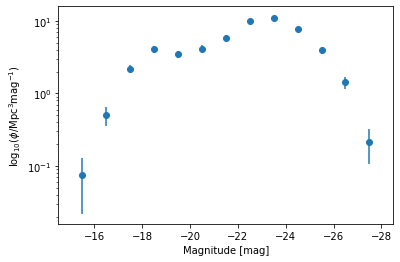

In [6]:
fig, ax = vmax.plot_lf_V_max(*vmax_counts)

In [7]:
bins = np.arange(np.ceil(min(flagged_agn[mid])), -14)
vmax_counts = vmax.v_max_counts(flagged_agn, bins, mid, selection_function=vmax.example_selection_func(flagged_agn[mid]), vmax_band=band)
flagged_agn[band].data

array([22.606075,       nan, 22.587841, ..., 19.483315, 22.185135,
       20.052412], dtype=float32)

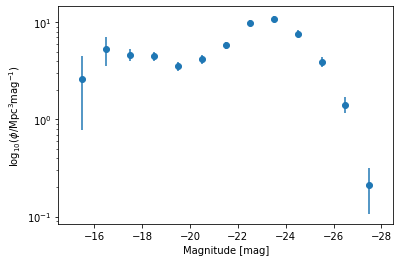

In [8]:
fig, ax = vmax.plot_lf_V_max(*vmax_counts)

In [9]:
# print(vmax_counts)
odr_out = xi2.odr_fit(*vmax_counts, initial_guesses=(10, -24, 0.05, -.5))


Beta: [ 15.26475157 -24.83376961  -0.74352927  -2.7029031 ]
Beta Std Error: [2.15541393 0.46380579 0.05367272 0.5109173 ]
Beta Covariance: [[1.35425349e+00 1.24763914e-01 2.81177217e-02 1.04470527e-01]
 [1.24763914e-01 6.27062640e-02 5.09327984e-03 5.37943750e-02]
 [2.81177217e-02 5.09327984e-03 8.39741750e-04 4.18697758e-03]
 [1.04470527e-01 5.37943750e-02 4.18697758e-03 7.60921423e-02]]
Residual Variance: 3.43053143849985
Inverse Condition #: 0.0066577630936472875
Reason(s) for Halting:
  Sum of squares convergence


In [10]:
odr_out.beta

array([ 15.26475157, -24.83376961,  -0.74352927,  -2.7029031 ])

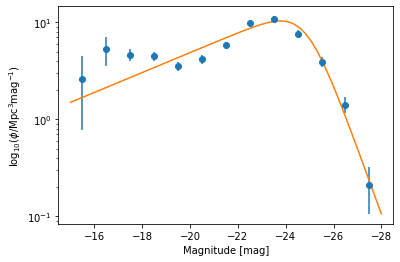

In [11]:
x_vals = np.linspace(min(bins), max(bins))
ax.plot(x_vals, xi2.double_power_law(odr_out.beta, x_vals))
fig

In [12]:
flagged_agn[band_vmax]

2321532824.8403134
0.0
2321532824.8403134
2321532824.8403134
2321532824.8403134
2321532824.8403134
2321532824.8403134
2321532824.8403134
0.0
2321532824.8403134
2321532824.8403134
